In [1]:
import pandas as pd
import pandapower as pp
import matplotlib.pyplot as plt
import numba
import numpy as np

In [2]:
def get_reactive(P,PF):
    """" Calculate reactive power from Active power and Power Factor """
    return P*np.tan(np.arccos(PF))

# Assignment

Goal
Find the solution of the load flow with the below defined grids, using the software at your convenience. In this assignment you should:
1.	Model the electric power system in the software 
2.	Make sure that the system converges.
3.	 Find the voltages of the buses and indentify the buses that have an excessive voltage drop (- 7%) from the nominal voltage. 
4.	Find solutions in order to mitigate this voltage drop.
5.	Find a cost effective (optimal) solution.

The grade will depend on the fulfillment of these points. 

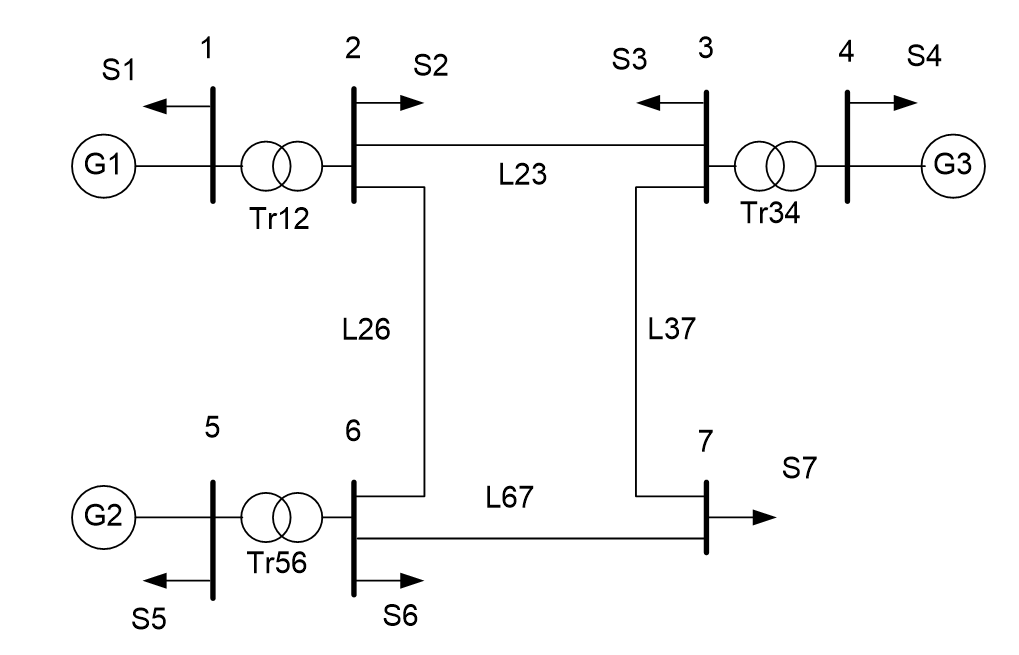

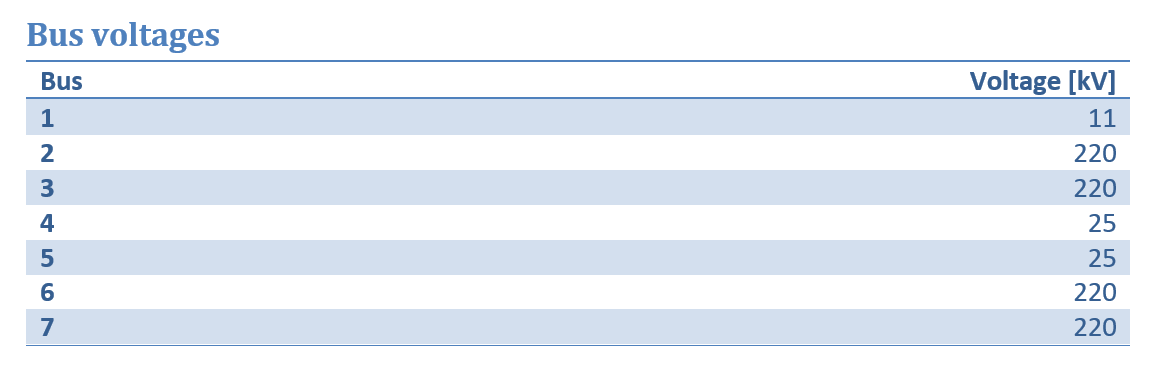

Permutation 1A 

In [3]:
net = pp.create_empty_network()

In [4]:
bus1 = pp.create_bus(net, name="Bus 1", vn_kv=11)
bus2 = pp.create_bus(net, name="Bus 2", vn_kv=220)
bus3 = pp.create_bus(net, name="Bus 3", vn_kv=220)
bus4 = pp.create_bus(net, name="Bus 4", vn_kv=25)
bus5 = pp.create_bus(net, name="Bus 5", vn_kv=25)
bus6 = pp.create_bus(net, name="Bus 6", vn_kv=220)
bus7 = pp.create_bus(net, name="Bus 7", vn_kv=220)

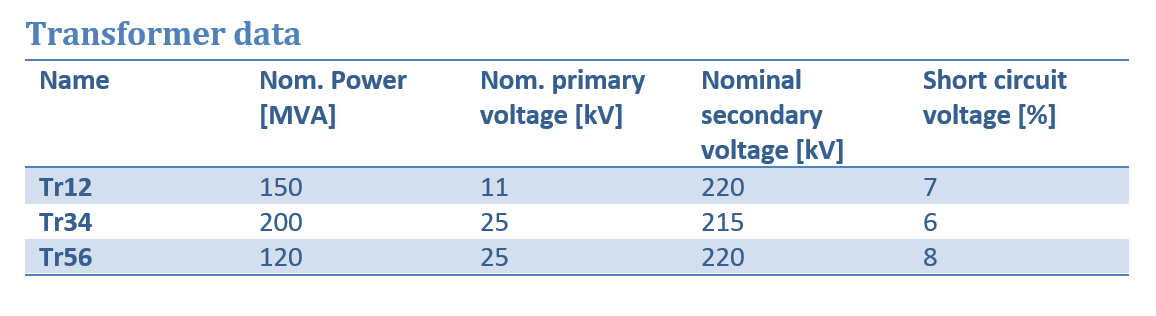

In [5]:
pp.create_transformer_from_parameters(net, hv_bus = bus2, lv_bus = bus1, sn_mva = 150, vn_hv_kv = 220, vn_lv_kv = 11, vkr_percent = 0, vk_percent = 7, pfe_kw = 0, i0_percent = 0)
pp.create_transformer_from_parameters(net, hv_bus = bus3, lv_bus = bus4, sn_mva = 200, vn_hv_kv = 215, vn_lv_kv = 25, vkr_percent = 0, vk_percent = 6, pfe_kw = 0, i0_percent = 0)
pp.create_transformer_from_parameters(net, hv_bus = bus6, lv_bus = bus5, sn_mva = 120, vn_hv_kv = 220, vn_lv_kv = 25, vkr_percent = 0, vk_percent = 8, pfe_kw = 0, i0_percent = 0)

2

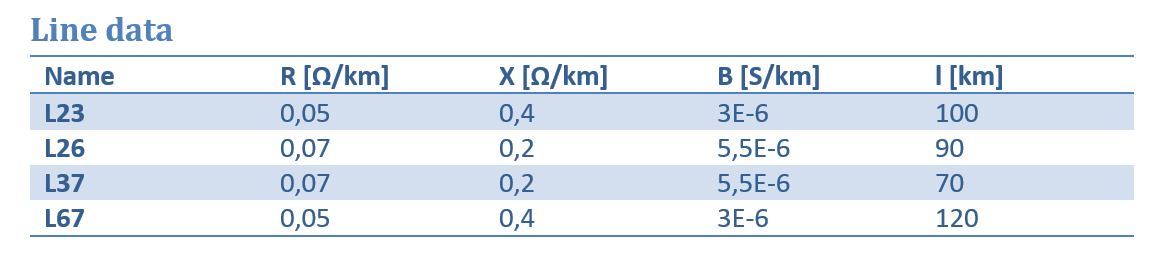

In [6]:
r2_3 = 0.05
r2_6 = 0.07
r3_7 = 0.07
r6_7 = 0.05

x2_3 = 0.4
x2_6 = 0.2
x3_7 = 0.2
x6_7 = 0.4

l2_3 = 100
l2_6 = 90
l3_7 = 70
l6_7 = 120

c_nf2_3 = 11
c_nf2_6 = 12.20
c_nf3_7 = 10
c_nf6_7 = 13.20

max_ik2_3 = 0.740
max_ik2_6 = 0.960
max_ik3_7 = 0.535
max_ik6_7 = 0.645

In [7]:
pp.create_line_from_parameters(net, from_bus = bus2, to_bus = bus3, length_km = l2_3, r_ohm_per_km = r2_3, x_ohm_per_km = x2_3, c_nf_per_km = c_nf2_3, max_i_ka = max_ik2_3, name=23)
pp.create_line_from_parameters(net, from_bus = bus2, to_bus = bus6, length_km = l2_6, r_ohm_per_km = r2_6, x_ohm_per_km = x2_6, c_nf_per_km = c_nf2_6, max_i_ka = max_ik2_6, name=26)
pp.create_line_from_parameters(net, from_bus = bus3, to_bus = bus7, length_km = l3_7, r_ohm_per_km = r3_7, x_ohm_per_km = x3_7, c_nf_per_km = c_nf3_7, max_i_ka = max_ik3_7, name=37)
pp.create_line_from_parameters(net, from_bus = bus6, to_bus = bus7, length_km = l6_7, r_ohm_per_km = r6_7, x_ohm_per_km = x6_7, c_nf_per_km = c_nf6_7, max_i_ka = max_ik6_7, name=67)

3

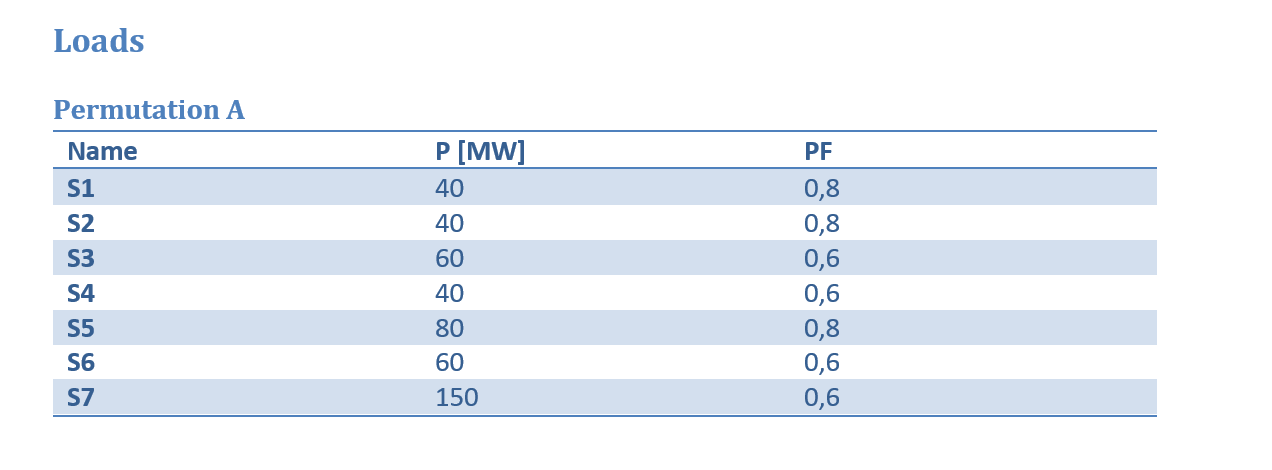

In [8]:
# Bus 1 Load
p_mw = 40
PF = 0.8
q_mvar = get_reactive(p_mw,PF)
pp.create_load(net, bus1, p_mw, q_mvar)

# Bus 2 Load
p_mw = 40
PF = 0.8
q_mvar = get_reactive(p_mw,PF)
pp.create_load(net, bus2, p_mw, q_mvar)

# Bus 3 Load
p_mw = 60
PF = 0.6
q_mvar = get_reactive(p_mw,PF)
pp.create_load(net, bus3, p_mw, q_mvar)

# Bus 4 Load 
p_mw = 40
PF = 0.6
q_mvar = get_reactive(p_mw,PF)
pp.create_load(net, bus4, p_mw, q_mvar)

# Bus 5
p_mw = 80
PF = 0.8
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus5, p_mw, q_mvar)

# Bus 6 Load
p_mw = 60
PF = 0.6
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus6, p_mw, q_mvar)

# Bus 7 Load
p_mw = 150
PF = 0.6
q_mvar=get_reactive(p_mw,PF)
pp.create_load(net, bus7, p_mw, q_mvar)

6

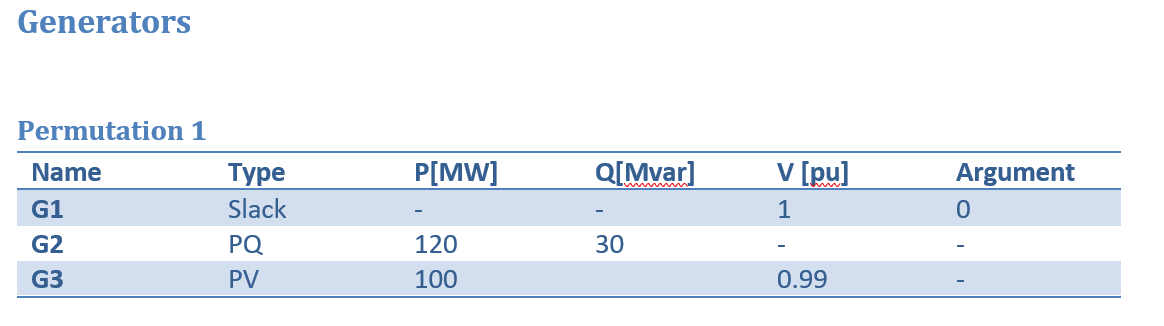

In [9]:
pp.create_ext_grid(net, bus1)

0

In [10]:
#Generators
p_mw = 100
pp.create_gen(net, bus4, p_mw, vm_pu = 0.99)
#PF = 1
#q_mvar = get_reactive(p_mw, PF)

#pp.create_sgen(net, bus4, p_mw, q_mvar)

0

In [11]:
# Bus 4 Generator 2 
p_mw = 120
q_mvar= 30
pp.create_sgen(net, bus5, p_mw, q_mvar)

0

In [12]:
q_mvar

30

In [13]:
net.trafo

,name,std_type,hv_bus,lv_bus,sn_mva,vn_hv_kv,vn_lv_kv,vk_percent,vkr_percent,pfe_kw,...,tap_neutral,tap_min,tap_max,tap_step_percent,tap_step_degree,tap_pos,tap_phase_shifter,parallel,df,in_service
0,None,None,1,0,150.0,220.0,11.0,7.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
1,None,None,2,3,200.0,215.0,25.0,6.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True
2,None,None,5,4,120.0,220.0,25.0,8.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,1,1.0,True


In [14]:
net.bus

,name,vn_kv,type,zone,in_service
0,Bus 1,11.0,b,None,True
1,Bus 2,220.0,b,None,True
2,Bus 3,220.0,b,None,True
3,Bus 4,25.0,b,None,True
4,Bus 5,25.0,b,None,True
5,Bus 6,220.0,b,None,True
6,Bus 7,220.0,b,None,True


In [15]:
pp.runpp(net)

In [16]:
net.res_bus

,vm_pu,va_degree,p_mw,q_mvar
0,1.000000,0.000000,-221.560202,-206.866488
1,0.909359,-6.528686,40.000000,30.000000
2,0.886198,-11.998841,60.000000,80.000000
3,0.990000,-10.849962,-60.000000,-275.138228
4,0.819041,-5.454404,-40.000000,30.000000
5,0.844088,-7.664980,60.000000,80.000000
6,0.813406,-12.629868,150.000000,200.000000
